<a href="https://colab.research.google.com/github/ilarman/visualizacion-trabajo-practico/blob/main/Actividad_pr%C3%A1ctica_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
En este notebook se van a procesar y visualizar los datos correspondientes a las visitas de los museos.

# Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importar dataset
Se importa el dataset del repositorio de github.

In [2]:
url_dataset = 'https://raw.githubusercontent.com/ilarman/visualizacion-trabajo-practico/main/Museum_Visitors.csv'
dataset = pd.read_csv(url_dataset)

# Comprobar que se haya importado correctamente
dataset

,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,Jan 2014,6602,24778,1581,NaN,4486,0.0,NaN,2204.0,2961.0,NaN,NaN
1,Feb 2014,5029,18976,1785,NaN,4172,0.0,NaN,1330.0,2276.0,NaN,NaN
2,Mar 2014,8129,25231,3229,NaN,7082,70.0,NaN,4320.0,3116.0,NaN,NaN
3,Apr 2014,2824,26989,2129,NaN,6756,250.0,NaN,3277.0,2808.0,NaN,NaN
4,May 2014,10694,36883,3676,NaN,10858,135.0,NaN,4122.0,3987.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Jan 2022,786,3756,455,0.0,823,0.0,353.0,0.0,0.0,277.0,0.0
97,Feb 2022,1325,4202,647,0.0,1006,0.0,387.0,0.0,0.0,534.0,0.0
98,Mar 2022,1499,6299,681,561.0,1494,0.0,398.0,0.0,0.0,614.0,0.0
99,Apr 2022,2786,11747,1183,0.0,2904,0.0,716.0,0.0,0.0,1232.0,0.0


# Preprocesamiento de los datos
Se va a realizar un preprocesamiento de los datos para procesar la fecha e imputar los datos faltes.

## Procesar fechas
Se le da el formato de fecha correcto a la columna correspondiente. Se añade también una columna adicional de mes y año.

In [3]:
# Procesar fechas
dataset['Date'] = pd.to_datetime(dataset['Month'], format='%b %Y')

# Añadir columna mes
dataset['Month'] = dataset['Date'].dt.month
# Añadir columna año
dataset['Year'] = dataset['Date'].dt.year

## Procesar datos faltantes
Se analiza si existen datos faltantes:

In [4]:
dataset.isnull().sum()

Month                                     0
America Tropical Interpretive Center      0
Avila Adobe                               0
Chinese American Museum                   0
Gateway to Nature Center                 53
Firehouse Museum                          0
Hellman Quon                             64
IAMLA                                    31
Pico House                                2
Visitor Center/ El Tranquilo Gallery     45
Museum of Social Justice                 48
Biscailuz Gallery/ PK Outdoor Exhibit    46
Date                                      0
Year                                      0
dtype: int64

Existen varios museos con datos faltantes. se van a imputar con un valor de 0 vistantes todos los datos faltantes:

In [5]:
dataset.fillna(0, inplace=True)

Se comprueba que se hayan imputado correctamente los datos faltantes:

In [6]:
dataset.isnull().sum()

Month                                    0
America Tropical Interpretive Center     0
Avila Adobe                              0
Chinese American Museum                  0
Gateway to Nature Center                 0
Firehouse Museum                         0
Hellman Quon                             0
IAMLA                                    0
Pico House                               0
Visitor Center/ El Tranquilo Gallery     0
Museum of Social Justice                 0
Biscailuz Gallery/ PK Outdoor Exhibit    0
Date                                     0
Year                                     0
dtype: int64

# Visualización de datos
Se va a realizar la visualización de datos de los datos procesados.

## Gráfico de lineas
Debido al número elevado de museos, se va a realizar este gráfico de líneas de forma interactiva mediante el servicio Datawrapper. Se exportan los datos procesados en formato CSV para graficarlos.

In [7]:
# Descarga CSV con los datos procesados
df_datawrapper = dataset[['America Tropical Interpretive Center', 'Avila Adobe',
       'Chinese American Museum', 'Gateway to Nature Center',
       'Firehouse Museum', 'Hellman Quon', 'IAMLA', 'Pico House ',
       'Visitor Center/ El Tranquilo Gallery', 'Museum of Social Justice',
       'Biscailuz Gallery/ PK Outdoor Exhibit', 'Date']]
from google.colab import files
df_datawrapper.to_csv('datos_procesados_datawrapper.csv', index=False) 
files.download('datos_procesados_datawrapper.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Gráfico de barras
Se va a realizar el diagrama de barras para visualizar en cada museo si se han llegado a alcanzar un número de visitantes parecido a antes de la pandemia. Debido a que solamente tenemos datos de los 5 primeros meses de 2022, se va a realizar la agregación de los 5 primeros meses de todo el histórico para poder realizar una comparación.

In [8]:
# Agregar datos sumando los 5 primeros meses por año y museo
df_agregado_year = dataset.loc[dataset['Month'] <= 5].groupby('Year').sum()
df_agregado_year = df_agregado_year.drop('Month', axis=1)

# Mostrar agregación
df_agregado_year

,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
Year,,,,,,,,,,,
2014,33278,132857,12400,0.0,33354,455.0,0.0,15253.0,15148.0,0.0,0.0
2015,42502,118366,12783,0.0,32518,3035.0,0.0,13054.0,14774.0,0.0,0.0
2016,36391,113608,20449,0.0,30210,110.0,0.0,565.0,15272.0,0.0,0.0
2017,29934,108770,19494,9137.0,26368,0.0,3442.0,3055.0,9392.0,0.0,4265.0
2018,26727,94123,17426,0.0,24989,0.0,6306.0,3950.0,0.0,15842.0,7027.0
2019,21775,88866,16559,4754.0,24959,0.0,6187.0,5915.0,0.0,11461.0,1444.0
2020,7645,33035,5552,1608.0,8309,0.0,2698.0,415.0,0.0,5922.0,0.0
2021,0,0,0,0.0,0,0.0,0.0,0.0,0.0,4710.0,0.0
2022,8522,38088,4102,561.0,9279,0.0,2614.0,0.0,0.0,3899.0,0.0


Se genera la visualización:

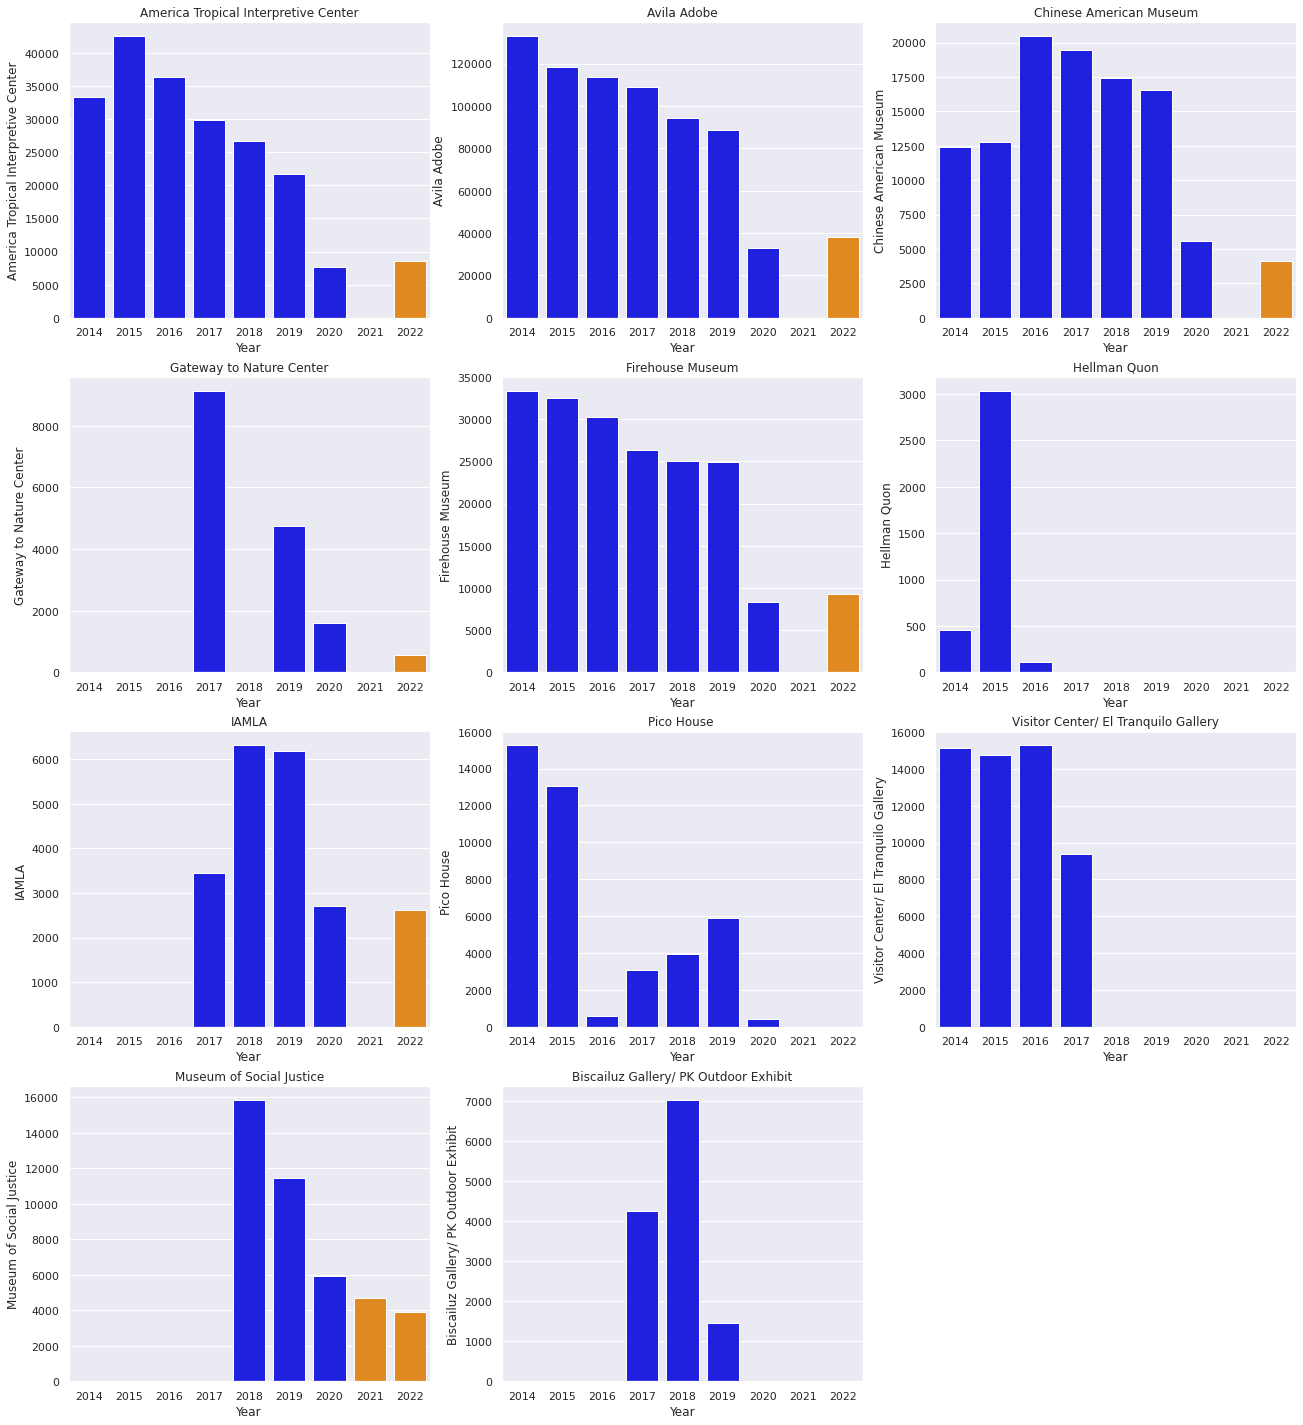

In [9]:
# Realizar visualización
fig, axes = plt.subplots(4, 3, figsize=(22, 25))

# Índices subplots
i = 0
j = 0

for columna in df_agregado_year:
  sns.barplot(ax=axes[i,j],
              x=df_agregado_year.index,
              y=df_agregado_year[columna],
              palette=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'darkorange', 'darkorange'])
  axes[i,j].set_title(columna)

  # Variar índices
  if j == 2:
    i += 1
    j = 0
  else:
    j += 1
  
axes[3,2].set_visible(False)


## Treemap
Se va a reprentar mediante un treemap la cantidad total de visitantes para el año 2022 para conocer cuáles son los museos más importantes a día de hoy. Se va a empezar a agregar los datos sumando todos los visitantes del año 2022 por año y se van a eliminar los museos sin visitantes para que no dé error el treemap.

Esta visualización se hará en Google sheet.

In [10]:
# Filtrar datos para el año 2022
dataset_2022 = dataset.loc[dataset['Year'] == 2022]

# Sumar visitantes y descartar museos sin visitantes
museos = []
visitantes = []

for columna in dataset_2022:
  if columna not in ['Month', 'Date', 'Year']:
    suma_visitantes = dataset_2022[columna].sum()
    if suma_visitantes != 0:  # solamete se consideran museos con visitantes
      museos.append(columna)
      visitantes.append(suma_visitantes)

# Crear nuevo dataframe con datos agreagados
df_agregado_2022 = pd.DataFrame({'museo':museos, 'visitantes':visitantes})
df_agregado_2022['visitantes'] = df_agregado_2022['visitantes'].astype(int)

# Visualizar datos agregados
df_agregado_2022

,museo,visitantes
0,America Tropical Interpretive Center,8522
1,Avila Adobe,38088
2,Chinese American Museum,4102
3,Gateway to Nature Center,561
4,Firehouse Museum,9279
5,IAMLA,2614
6,Museum of Social Justice,3899


Se descargan los datos procesados para importarlos a google sheet:

In [11]:
# Descarga CSV con los datos procesados
from google.colab import files
df_agregado_2022.to_csv('datos_procesados.csv', index=False) 
files.download('datos_procesados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>